In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from cutout import Cutout
import albumentations as A
from PIL import Image
import numpy as np
from cutout import Cutout

### test cutout

In [4]:
def test_augmentation(image_path):
    image = Image.open(image_path)
    list_transforms = [A.VerticalFlip(p=1)]
    list_transforms.insert(0, Cutout(num_holes=1, max_h_size=128, max_w_size=128, p=1))
    transform = A.Compose(
        list_transforms
    )
    
    transformed_image = transform(image=np.array(image))
    transformed_image_pil = Image.fromarray(transformed_image['image'])

    # Display the original and transformed images
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(transformed_image_pil)
    axs[1].set_title('Transformed Image')
    axs[1].axis('off')

    plt.show()

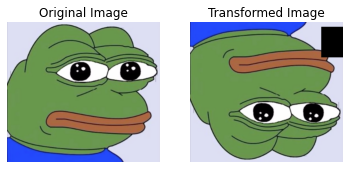

In [9]:
# Example usage
image_path = './images/ech.jpg'

# Test augmentation
test_augmentation(image_path)

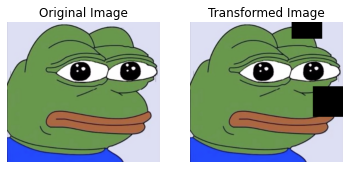

In [176]:
# Example usage
image_path = 'ech.jpg'

# Test augmentation
test_augmentation(image_path)


### test mixup

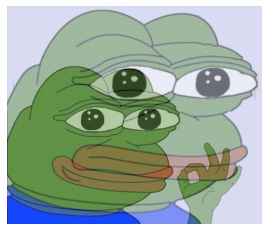

In [178]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def mixup(image1, image2, alpha):
    beta = 1.0 - alpha

    # Ensure the images have the same size
    assert image1.size == image2.size, "Images must have the same size"

    # Perform mixup
    mixed_image = Image.blend(image1, image2, alpha)

    return mixed_image

# Load two images
image1 = Image.open('ech.jpg')
image2 = Image.open('ech1.jpg')

# Check if images have different sizes
if image1.size != image2.size:
    # Resize the images to the same size
    min_width = min(image1.size[0], image2.size[0])
    min_height = min(image1.size[1], image2.size[1])
    image1 = image1.resize((min_width, min_height))
    image2 = image2.resize((min_width, min_height))

# Set mixup hyperparameter (alpha)
alpha = 0.5

# Apply mixup
mixed_image = mixup(image1, image2, alpha)

# Display the mixed image using plt
plt.imshow(mixed_image)
plt.axis('off')
plt.show()


### test cutmix

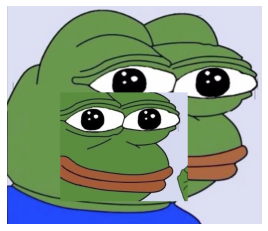

In [179]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

def cutmix(image1, image2, alpha):
    assert image1.size == image2.size, "Images must have the same size"

    width, height = image1.size
    cut_width = int(width * alpha)
    cut_height = int(height * alpha)

    # Randomly select the position of the cut
    left = random.randint(0, width - cut_width)
    upper = random.randint(0, height - cut_height)
    right = left + cut_width
    lower = upper + cut_height

    # Create a copy of image1
    mixed_image = image1.copy()

    # Paste the cut region from image2 onto mixed_image
    cut_region = image2.crop((left, upper, right, lower))
    mixed_image.paste(cut_region, (left, upper))

    return mixed_image

# Load two images
image1 = Image.open('ech.jpg')
image2 = Image.open('ech1.jpg')

# Check if images have different sizes
if image1.size != image2.size:
    # Resize the images to the same size
    min_width = min(image1.size[0], image2.size[0])
    min_height = min(image1.size[1], image2.size[1])
    image1 = image1.resize((min_width, min_height))
    image2 = image2.resize((min_width, min_height))

# Set cutmix hyperparameter (alpha)
alpha = 0.5

# Apply cutmix
mixed_image = cutmix(image1, image2, alpha)

# Display the mixed image using plt
plt.imshow(mixed_image)
plt.axis('off')
plt.show()


### test fmix

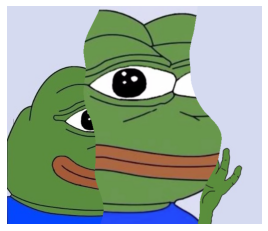

In [223]:
from fmix import sample_mask

def fmix(image1, image2, alpha, decay_power, shape, max_soft=0.0):
    lam, mask = sample_mask(alpha, decay_power, shape, max_soft)
    shuffled_image = image2
    x1 = mask * image1
    x2 = (1 - mask) * shuffled_image
    
    return (x1 + x2), lam

# Load two images
image1 = Image.open('ech.jpg')
image2 = Image.open('ech1.jpg')

# Check if images have different sizes
if image1.size != image2.size:
    # Resize the images to the same size
    min_width = min(image1.size[0], image2.size[0])
    min_height = min(image1.size[1], image2.size[1])
    image1 = image1.resize((min_width, min_height))
    image2 = image2.resize((min_width, min_height))

# Convert images to NumPy arrays

image1 = np.array(image1).transpose(2, 0, 1)
image2 = np.array(image2).transpose(2, 0, 1)

# Set fmix hyperparameters
alpha = 1.0
decay_power = 3.0
shape = (487, 570)

# Apply fmix
mixed_image, lam = fmix(image1, image2, alpha, decay_power, shape)

# Display the mixed image using plt
plt.imshow(mixed_image.astype(np.uint8).transpose(1, 2, 0))
plt.axis('off')
plt.show()